# 1.Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('/datasets/games.csv', sep=',')
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получение информации о датасете, количестве пропусков и явных дублиуатов
df.info()
print(df.isna().sum())
print('Явных дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
R

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


        Итог:
        1.Необходимо изменить формат данных в столбцах year_of_release на 'int' и user_score на 'float', т.к. год это целое число, а пользовательский рейтинг - число с дробной частью.
        2.Удалю строки с пропусками в столбцах name, genre - заполнить их невозможно и их количество ничтожно мало, это не повлияет на выводы.
        Для изменения типа данных в столбце с годом удалю строки с пустыми значениями, потеря 1,6% данных не даст искажений. Нет возможности восстановить утраченные года выхода игр, т.к. одна и та же игра могла выпускаться на разных платформах  в разное время.
        3.Остальные пропуски трогать не стоит. Как они появились - думаю, ошибки при сборе и хранении данных. 
        Пропуски в рейтингах также невозможно заменить чем-то адекватным. 
        4. Есть нулевые продажи по регионам. Рассмотрим и устраним.

# 2. Подготовка данных

In [9]:
#привожу названия колонок к нижнему регистру
df.columns = df.columns.str.lower()
# удаляю строки
df.dropna(subset=['name', 'genre'], inplace = True) 

#Поработаем с годом
df['year_of_release'] = df['year_of_release'].dropna().astype('int')

# Теперь изменим значения tbd в юзерском рейтинге. 
# tbd - to be determind - будет определено позднее. можно заменить None, т.к. по сути это отсутсвующие данные. 
# Наверняка, при сборе данных в этих случаях оценки еще собирались.
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')

# Создам столбец с суммарными продажами
df['summary_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [10]:
# посмотрим нулевые продажи по всем регионам
df[df['summary_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [12]:
#удалим строки с нулями продаж, посмотрим describe
df.drop(labels = [16676, 16709], axis = 0, inplace = True)
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,summary_sales
count,16442.000000,16711.000000,16711.000000,16711.000000,16711.000000,8137.000000,7590.000000,16711.000000
mean,2006.486072,0.263334,0.145063,0.077634,0.047348,68.967679,7.125046,0.533379
std,5.875859,0.813609,0.503386,0.308888,0.186752,13.938165,1.500006,1.548364
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Вывод:
        В датасете заключены данные об играх, выпущенных с 1980г по 2016г, половина из которых вышла после 2007 года.Об их продажах и рейтингах. Минимальная оценка критиков 13б, максимальная - 98(шкала 100б), минимальная оценка пользователей по 10б шкале - 0, максимальная - 9,7 б. Максимальное суммарное количество проданных копий 82,54 млн., медианное значение продаж по миру - 0,17 млн копий. 
      

# 2.Исследовательский анализ данных

 ### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

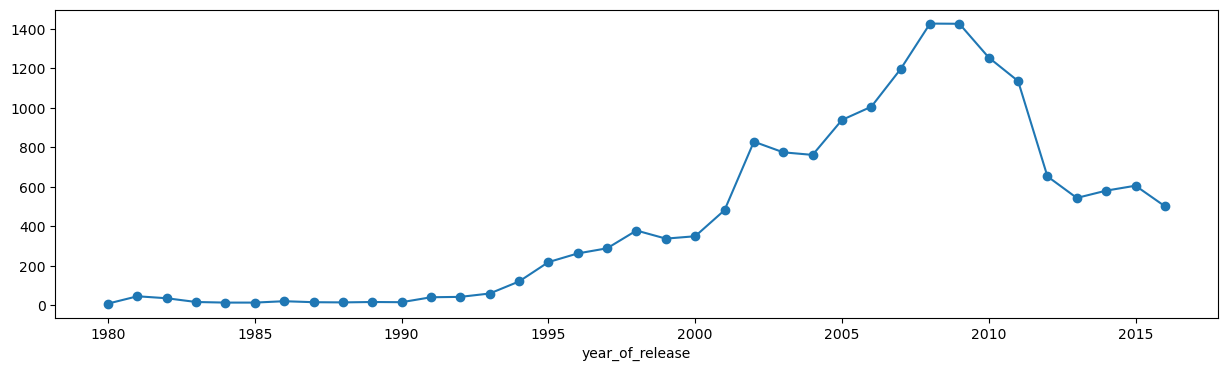

In [5]:
df.groupby('year_of_release')['name'].count().plot(figsize = (15, 4), style = 'o-')
plt.show()

С ростом индустрии росло и число выпукаемых игр. Отметим, что 2008 - 2009 годы стали лучшими по количеству выпускаемых игр - это порядка 1400 игр за один год. Мировой финансовый кризис с 2008 года повлек за собой спад во многих сферах, в том числе и игровой, это очень четко отражено на графике.
Разумеется, данные за весь период не важны, время идет, тренды меняются, сменяются поколения. Поэтому для прогноза на 2017 год можно рассматривать конкретный период. Об этом далее.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Text(0.5, 0, 'Год')

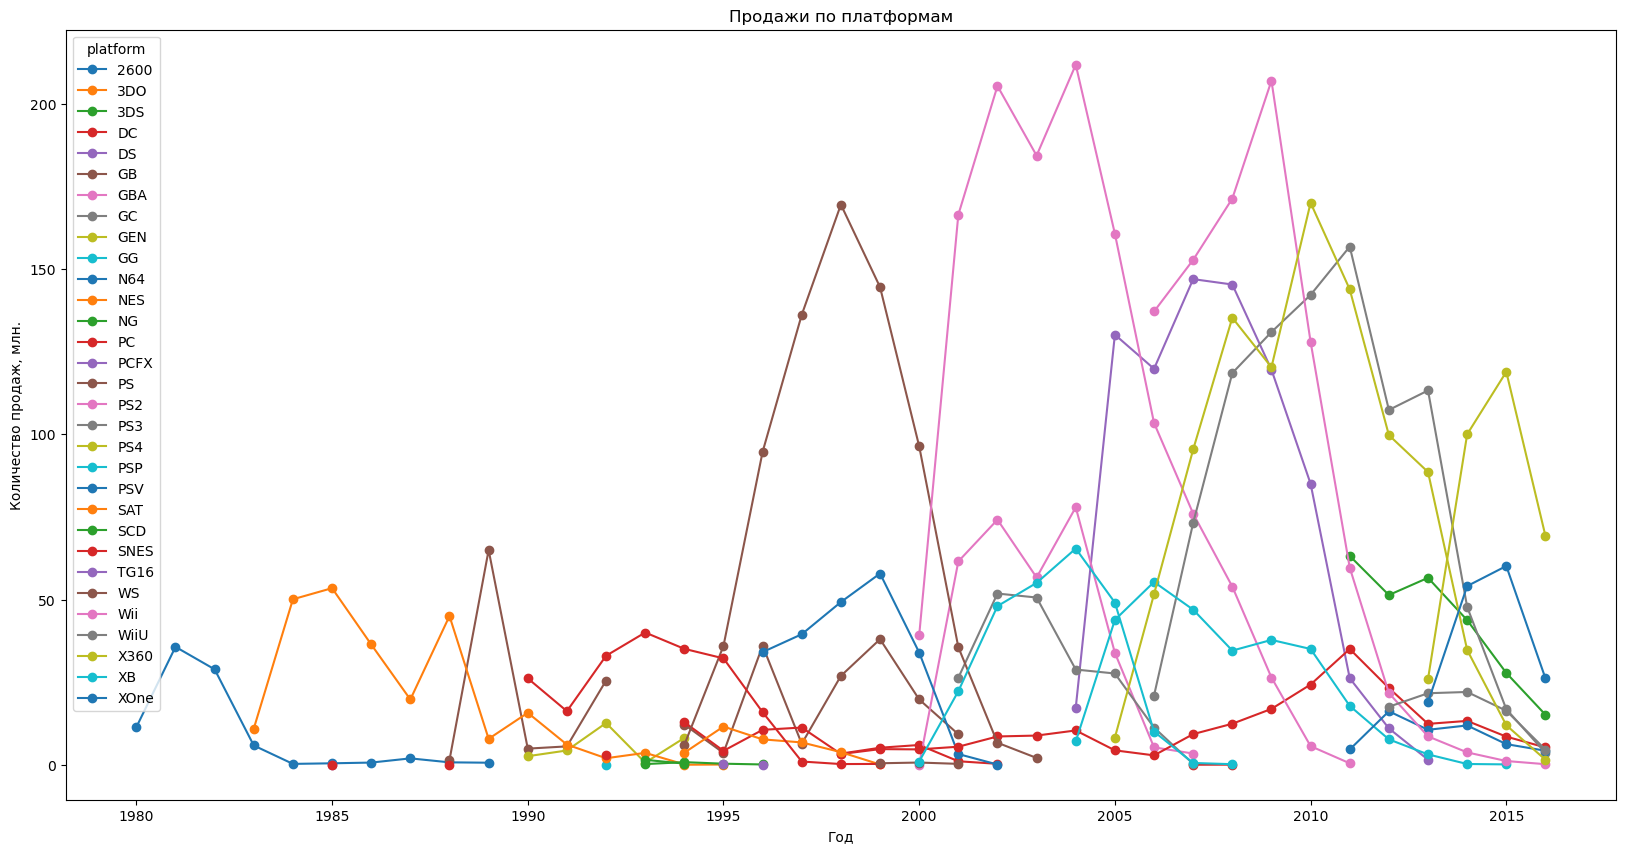

In [6]:
#Как менялись продажи по платформам.
df.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'summary_sales', aggfunc = 'sum'
).plot(figsize = (20, 10), title = 'Продажи по платформам', style = 'o-')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('Год')

In [7]:
# Платформы с наибольшими суммарными продажами
df.groupby('platform')['summary_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: summary_sales, dtype: float64

Text(0.5, 0, 'Год')

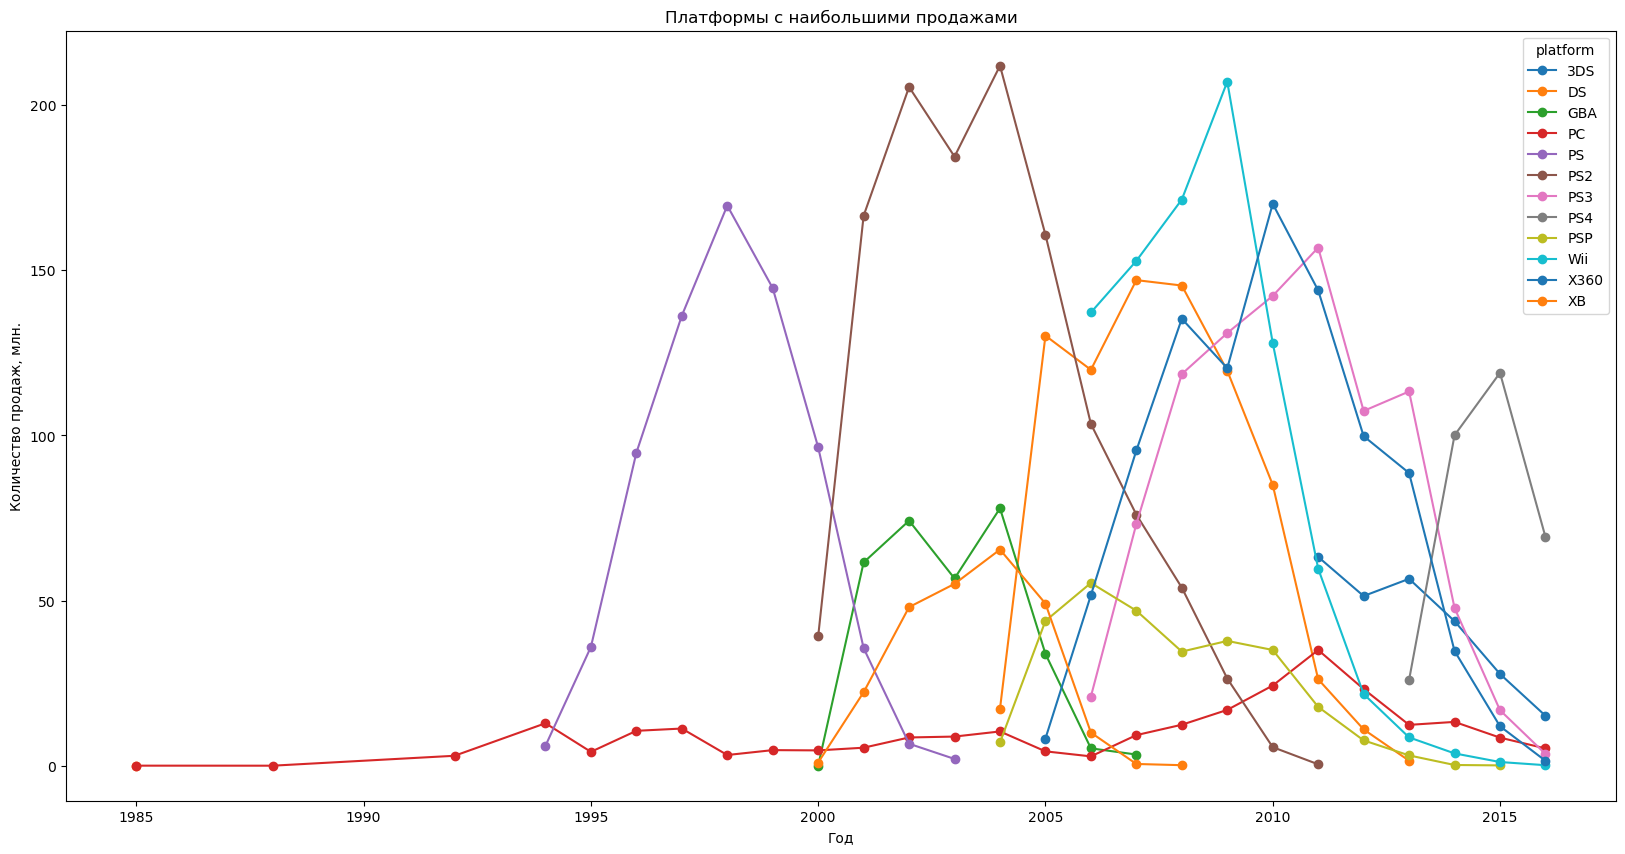

In [8]:
# построим распределение по годам
top_sale = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC', '3DS', 'XB'])]
top_sale.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'summary_sales', aggfunc = 'sum'
).plot(figsize = (20, 10), title = 'Платформы с наибольшими продажами', style = 'o-')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('Год')


         Платформа имеет какой-то срок жизни, соответсвенно сначала прожади идут вверх, достигая каких-то высот, потом идут на спад.
         В общем мы видим, что с появлением на рынке PS в 1994 году интерес к играм у потребителей значительно увеличивается, также можно заметить повышение заинтересованности бизнеса в индустрии, т.к. на графике"Продажи по платформам" после 1990 г видим более значимое число выпускаемых игровых платформ.
         Среди платформ с наибольшими продажами, мы видим, что приблизительно платформа "живет" от 7 до 11 лет.

### Выберите несколько потенциально прибыльных платформ за актуальный период

Для прогноза продаж в 2017 я выбрала период  2014-2016 годы, т.к. в 2013 году вышли платформы XOne и PS4,для этих платформ за этот период продавалось большое число копий игр и эти платформы будут жить еще некоторе время. По этим данным и данным о продажах игр на других платформах за актуальный период можно сделать прогноз.

In [14]:
actual_df = df.query('year_of_release > 2013')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [16]:
#Определение топа платформ в актуальном периоде
actual_df.groupby('platform')['summary_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: summary_sales, dtype: float64

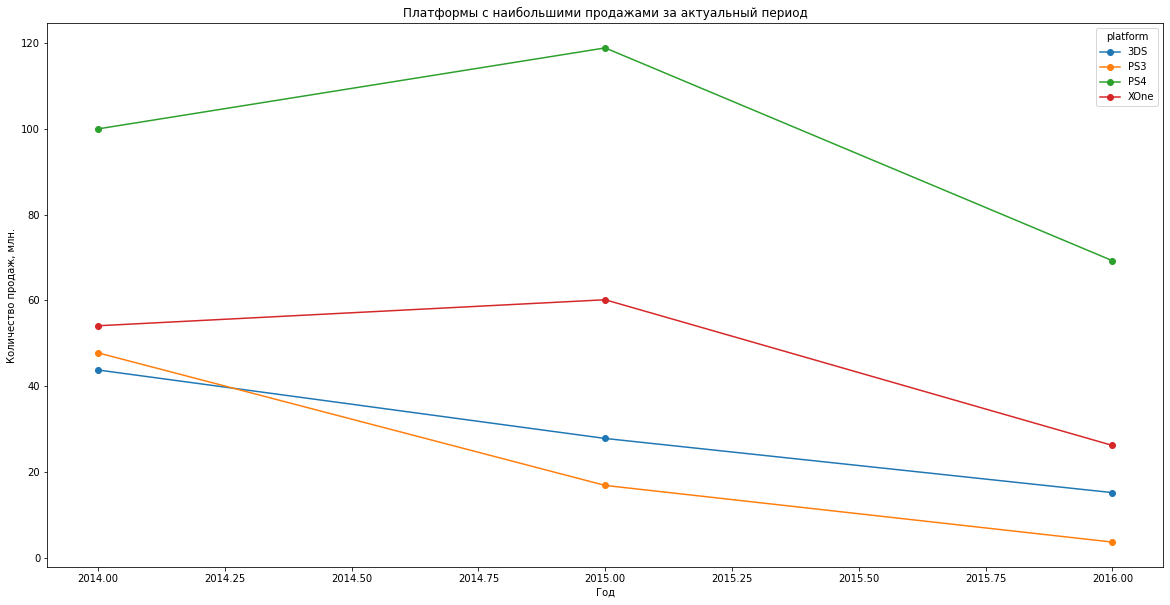

In [17]:
# Возьмем первые 4 наиболее прибыльные платформы и посмотрим их на графике.
actual_df[actual_df['platform'].isin(['PS4', 'XOne', 'PS3', '3DS'])].pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'summary_sales', aggfunc = 'sum'
).plot(figsize = (20, 10), title = 'Платформы с наибольшими продажами за актуальный период', style = 'o-')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('Год')
plt.show()

Выводы:
        По графику видим, что к середине 2016 года продажи по всем платформам идут на спад в сравнении с серединой 2015 года, где продажи игр для PS4, XOne идут вверх. Но однозначно об итогах 2016 не сказать, тк данные могут быть неполными.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


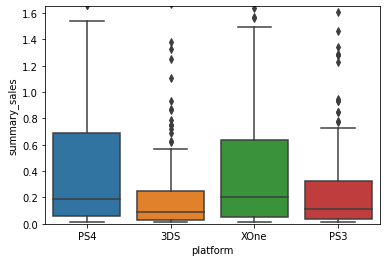

In [19]:

platform = actual_df.query('platform in ["PS4", "XOne", "PS3", "3DS"]')['platform']
sales =  actual_df.query('platform in ["PS4", "XOne", "PS3", "3DS"]')['summary_sales']
sns.boxplot(x=platform, y=sales)
plt.ylim([0,1.65])
actual_df[actual_df['platform'].isin(['PS4', 'XOne', 'PS3', '3DS'])].groupby('platform')['summary_sales'].describe()

            В актуальном периоде(2014-2016) по числу проданных копий наибольшее медианное значение у плаформы XOne, в общем медианы варьируются от 0,09 до 0,2 млн копий. Наименьшее медианное значение 0,09 у платформы 3DS. По верхним границам графика выделяются платформы PS4 и XOne - примерно 1,55 млн копий и 1,5 млн копий соответственно. В промежутке между лидерами и 3DS находится PS3 с медианой 0,11 млн соответственно.

### Как влияют на продажи внутри платформы отзывы пользователей и критиков?

               summary_sales  critic_score  user_score
summary_sales       1.000000      0.402661   -0.040132
critic_score        0.402661      1.000000    0.546434
user_score         -0.040132      0.546434    1.000000


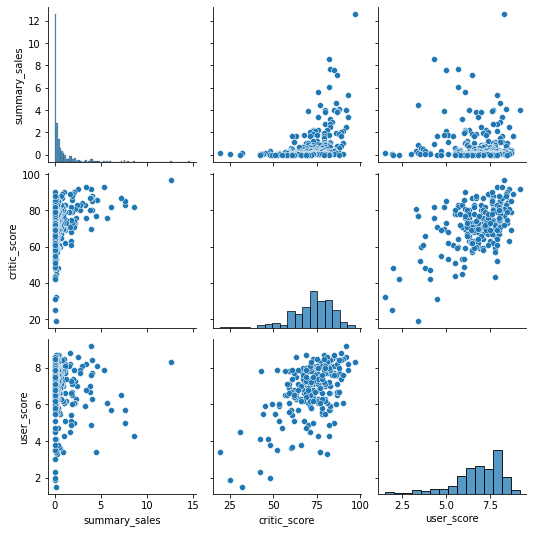

In [21]:
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
# PS4
print(actual_df.query('platform in "PS4"')[['summary_sales', 'critic_score', 'user_score']].corr())
sns.pairplot(actual_df.query('platform in "PS4"')[['summary_sales', 'critic_score', 'user_score']])
plt.show()

Коэф. корреляции продажи/оценка критиков = 0,4
Коэф. корреляции продажи/оценка пользователей = -0,04

               summary_sales  critic_score  user_score
summary_sales       1.000000      0.446575   -0.166761
critic_score        0.446575      1.000000    0.693445
user_score         -0.166761      0.693445    1.000000


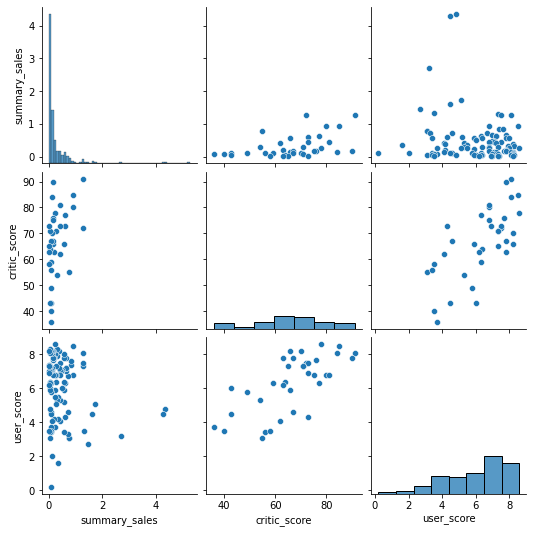

In [22]:
#PS3
print(actual_df.query('platform in "PS3"')[['summary_sales', 'critic_score', 'user_score']].corr())
sns.pairplot(actual_df.query('platform in "PS3"')[['summary_sales', 'critic_score', 'user_score']])
plt.show()

Коэф. корреляции продажи/оценка критиков = 0,45
Коэф. корреляции продажи/оценка пользователей = -0,16

               summary_sales  critic_score  user_score
summary_sales       1.000000      0.428677   -0.070384
critic_score        0.428677      1.000000    0.440977
user_score         -0.070384      0.440977    1.000000


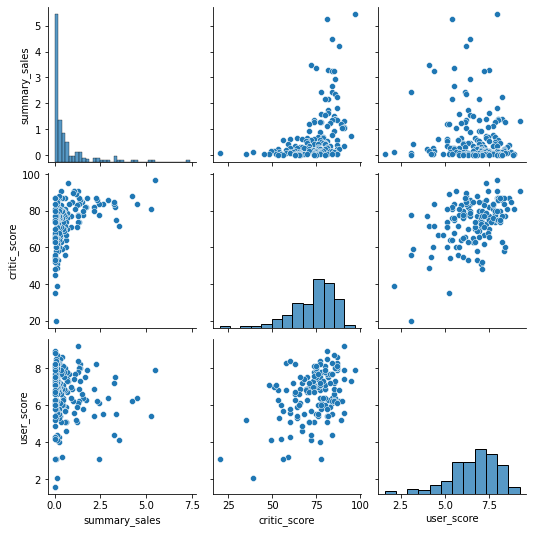

In [23]:
#XOne
print(actual_df.query('platform in "XOne"')[['summary_sales', 'critic_score', 'user_score']].corr())
sns.pairplot(actual_df.query('platform in "XOne"')[['summary_sales', 'critic_score', 'user_score']])
plt.show()

Коэф. корреляции продажи/оценка критиков = 0,43
Коэф. корреляции продажи/оценка пользователей = -0,07

               summary_sales  critic_score  user_score
summary_sales       1.000000      0.314117    0.215193
critic_score        0.314117      1.000000    0.862485
user_score          0.215193      0.862485    1.000000


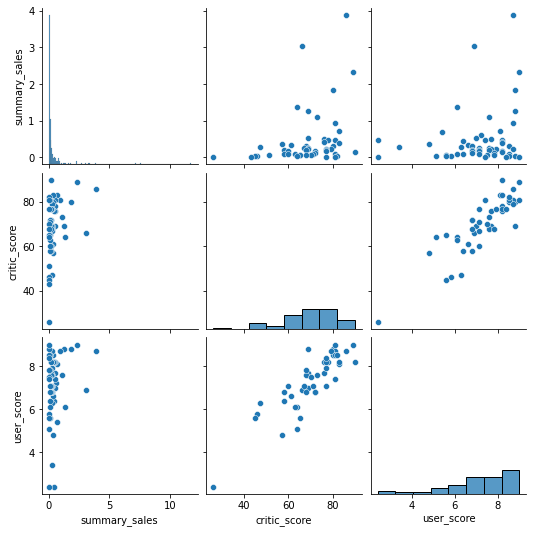

In [24]:
# 3DS
print(actual_df.query('platform in "3DS"')[['summary_sales', 'critic_score', 'user_score']].corr())
sns.pairplot(actual_df.query('platform in "3DS"')[['summary_sales', 'critic_score', 'user_score']])
plt.show()


Коэф. корреляции продажи/оценка критиков = 0,31
Коэф. корреляции продажи/оценка пользователей = 0,21

    Вывод:
       По коэф. корреляции мы видим наличие связи между продажами и оценкой критиков, чем выше оценка, тем больше копий  покупают.
       По коэф. корр. продажи/оценка пользователей можно сказать, что оценка пользователй в основном не влияет на объем продаж,значение коэффициента в основном около 0. Только в случае с платформой 3DS корреляция = 0,21, такое значение может говорить о некой зависимости, но скорее всего это совпадение.

### Посмотрите на общее распределение игр по жанрам. 
### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [43]:
# сделаем сводную таблицу c продажами и количеством игр по жанрам
genre = pd.pivot_table(actual_df,
               index=["genre"],
               values=["summary_sales"],
               aggfunc=[np.median, np.sum, len]).sort_values(by=('median', 'summary_sales'), ascending=False)
genre['mean_number_of_downloads'] = genre[('sum', 'summary_sales')]*1000/genre[('len', 'summary_sales')] 
# Среднее количество скачиваний 1ой игры в тысячах штук
genre

,median,sum,len,mean_number_of_downloads
,summary_sales,summary_sales,summary_sales,
genre,,,,
Shooter,0.515,170.94,128.0,1335.468750
Sports,0.180,109.48,161.0,680.000000
Platform,0.140,18.09,38.0,476.052632
Fighting,0.125,28.22,60.0,470.333333
Role-Playing,0.110,101.44,221.0,459.004525
Simulation,0.100,13.13,44.0,298.409091
Action,0.090,199.36,619.0,322.067851
Misc,0.090,37.55,113.0,332.300885


        
       Вывод:
              Самым популярным жанром по медианам продаж является "Shooter", медиана равна 0,5 млн копий, а количество выпущенных игр = 128, примерное среднее число покупок одной игры в это жанре 1335,46 тыс штук.
              На втором месте жанр "Sports", он примерно на 35% уступает лидеру по медиане проданных копий, равной 0,18 млн, однако число игр в данном жанре выше -  161, число покупок на одну игру в среднем 680 тыс штук.
              Пятерку замыакют:
              Platform медиана - 0.14 млн,	выпушено игр - 38.0 
              Fighting	 медиана -0.125 млн, выпушено игр - 60.0
              Role-Playingмедиана -	0.110 млн, выпушено игр - 221.0.
              
              Самыми непопулярными по медианам оказались "Пазлы" и "Приключения", выпустившие 14 и 185 игр за актуальный период соответсвенно. 

# 3.Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона cамые популярные платформы. 

In [45]:
platform_na = pd.pivot_table(actual_df,
               index=['platform'],
               values=['na_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'na_sales'), ascending=False).head(5)
platform_na['sales_%'] = platform_na[('sum', 'na_sales')]/platform_na[('sum', 'na_sales')].sum()*100
platform_na

,sum,sales_%
,na_sales,
platform,,
PS4,98.61,38.996322
XOne,81.27,32.139044
X360,28.30,11.191521
3DS,22.64,8.953217
PS3,22.05,8.719896


В Северной Америке наибольшая доля продаж приходится на PS4 - 38.9% и  XOne - 32% , неудивительно, это самые новые платформы в этом периоде. Остальные платформы имеют меньшие доли в связи с уменьшением актуальности по сравнение с новичками.


In [46]:
platform_eu = pd.pivot_table(actual_df,
               index=['platform'],
               values=['eu_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'eu_sales'), ascending=False).head(5)
platform_eu['sales_%'] = platform_eu[('sum', 'eu_sales')]/platform_eu[('sum', 'eu_sales')].sum()*100
platform_eu

,sum,sales_%
,eu_sales,
platform,,
PS4,130.04,55.120380
XOne,46.25,19.604103
PS3,25.54,10.825704
PC,17.97,7.616989
3DS,16.12,6.832825


В Европе лидерами стали PS4 - 55% и  XOne - 19,6% - ситуация аналогична с Америкой. Но надо заметить, что для половины Европы XOne была доступна только через год после анонса в Америке и другой половине европейских стран, поэтому ее рейтинг ниже, чем в Америке
С остальными платформами тоже самое что и на Американском континете - потеря актуальности.

In [48]:
platform_jp = pd.pivot_table(actual_df,
               index=['platform'],
               values=['jp_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'jp_sales'), ascending=False).head(5)
platform_jp['sales_%'] = platform_jp[('sum', 'jp_sales')]/platform_jp[('sum', 'jp_sales')].sum()*100
platform_jp

,sum,sales_%
,jp_sales,
platform,,
3DS,44.24,47.915087
PS4,15.02,16.267735
PSV,14.54,15.747861
PS3,11.22,12.152063
WiiU,7.31,7.917253


        В Японии же картина совсем иная. XBox совсем не представлен в 5ке лидеров, тк Японцы не сильно рады пускать на свой рынок то, что не вписывается в их национальный менталитет и тп. Например, по сравнению с PS Xbox крупная и ее предпочитают реже,чтобы размещать в своих жилищах. Также Xbox выходят на Японский рынок с опозданием.
        Лидером у Японцев является платформа 3DS - 47,9% доля продаж, не удивительно, Nintendo родилась в Японии задолго до PS, также PS4 не успела набрать такую же как на Западе популярность у практичных Японцев - 16,26%, также еще и потому, что  анонс произошел на несколько месяцев позже,чем в других старанх.
      

### Определите для пользователя каждого региона самые популярные жанры

In [49]:
genre_na = pd.pivot_table(actual_df,
               index=['genre'],
               values=['na_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'na_sales'), ascending=False).head(5)
genre_na['sales_%'] = genre_na[('sum', 'na_sales')]/genre_na[('sum', 'na_sales')].sum()*100
genre_na

,sum,sales_%
,na_sales,
genre,,
Shooter,79.02,32.095857
Action,72.53,29.459789
Sports,46.13,18.736799
Role-Playing,33.47,13.594639
Misc,15.05,6.112916


        В Северной Америке самыми популярными жанрами являются 'Action'- 29,45%, 'Shooter'-32%.,топ-5 закрывает    жанр "Misc" - 6,1%

In [77]:
genre_eu = pd.pivot_table(actual_df,
               index=['genre'],
               values=['eu_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'eu_sales'), ascending=False).head(5)
genre_eu['sales_%'] = genre_eu[('sum', 'eu_sales')]/genre_eu[('sum', 'eu_sales')].sum()*100
genre_eu

,sum,sales_%
,eu_sales,
genre,,
Action,74.68,32.721378
Shooter,65.52,28.707882
Sports,45.73,20.036805
Role-Playing,28.17,12.342812
Racing,14.13,6.191123


В Европе очень похожая ситуация по распределению в рейтинге. 'Action'- 32,7%, 'Shooter'-28,7%., однако топ-5 закрывает  другой жанр -  "Racing" - 6,2%.

In [51]:
genre_jp = pd.pivot_table(actual_df,
               index=['genre'],
               values=['jp_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'jp_sales'), ascending=False).head(5)
genre_jp['sales_%'] = genre_jp[('sum', 'jp_sales')]/genre_jp[('sum', 'jp_sales')].sum()*100
genre_jp

,sum,sales_%
,jp_sales,
genre,,
Role-Playing,31.16,40.159814
Action,29.58,38.123470
Fighting,6.37,8.209821
Misc,5.61,7.230313
Shooter,4.87,6.276582


        В Японии лидирует жанр 'Role-Playing' - 40%, второе место занимает 'Action'- 38%,. Эти два жанра занимают почти весь рынок. Также в топ входят жанры Misc, Fighting, Shooter - 7%, 8%, 6% соответсвенно.  Такие различия с Западом могут быть вызваны помимо разниц менталитета еще и разным подходом к ограничению контента для разных групп возрастов. Возможно, такая информационная политика.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [78]:
# Распределение мировых продаж по рейтингу ESRB
pd.pivot_table(actual_df,
               index=['rating'],
               values=['summary_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'summary_sales'), ascending=False)

,sum
,summary_sales
rating,
M,226.54
E,133.13
T,99.13
E10+,71.68


#### Распределение мировых продаж по рейтингу ESRB

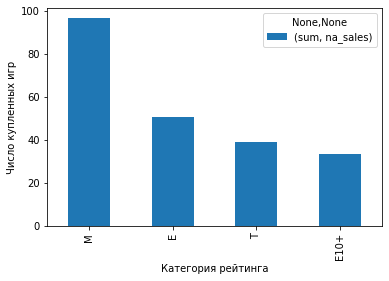

In [72]:
pd.pivot_table(actual_df,
               index=['rating'],
               values=['na_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'na_sales'), ascending=False).plot(kind='bar')
plt.ylabel("Число купленных игр")
plt.xlabel("Категория рейтинга")
plt.show()


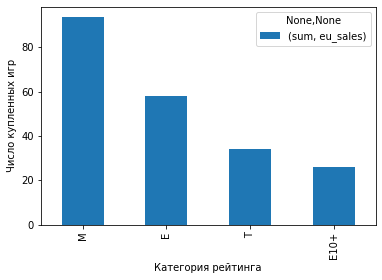

In [71]:
pd.pivot_table(actual_df,
               index=['rating'],
               values=['eu_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'eu_sales'), ascending=False).plot(kind='bar')
plt.ylabel("Число купленных игр")
plt.xlabel("Категория рейтинга")
plt.show()


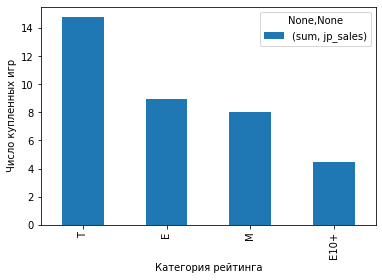

In [70]:
pd.pivot_table(actual_df,
               index=['rating'],
               values=['jp_sales'],
               aggfunc=[np.sum]).sort_values(by=('sum', 'jp_sales'), ascending=False).plot(kind='bar')
plt.ylabel("Число купленных игр")
plt.xlabel("Категория рейтинга")
plt.show()


        Вывод:
        Пользовательские рейтинги влияют на продажи.
        Так в Северной Америке и Европе больше всего продаж приходится на категорию "М"-для взрослых 17+, а в Японии на категорию "Т" - подростки 13+. 
        Вобще продажи в Западных регионах относительно рейтинга распределились в одинаковом порядке, на последнем месте категория "Т". А в Японии на последнем "Е10+" - дети 10+. На втором месте во всех регионах категория "Е" - для всех. Третье место в Америке и Европе заняла категория "Е10+", в Японии - "М".      

# 4.Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


За Н0 берем гипотезу сформулированную в задании, за Н1 - противоположную формулировку.
Критерий для проверки гипотез ttest_ind  - сравниваем средние значения двух независимых выборок, задаем параметр equal_var=False, тк выборки не равны по размеру.

        H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны
        H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [75]:
from scipy import stats as st

data_XOne = actual_df.query('platform == "XOne"')['user_score'].dropna()
data_PC = actual_df.query('platform == "PC"')['user_score'].dropna()
alpha = 0.01

results = st.ttest_ind(data_XOne, data_PC, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 



p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


По результатам теста  принимаем гипотезу Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action  и Sports разные.

        H0 - Средние пользовательские рейтинги жанров Action и Sports равны
        H1 - Средние пользовательские рейтинги жанров Action и Sports не равны

In [76]:
action = actual_df.query('genre in "Action"')['user_score'].dropna()
sports = actual_df.query('genre in "Sports"')['user_score'].dropna()
alpha = 0.01


results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


По результатам теста  принимаем гипотезу Н1 - Средние пользовательские рейтинги жанров Action и Sports не равны

# 5.Общий вывод

       
       1.В данных об играх, выпущенных с 1980- 2016 годы, видим значительный подъем игровой индустрии начиная с 1994 года, пиком продаж стали 2008-2009 годы по 1400 копий в год. На фоне мирового кризиса произошел спад.Но несмторя на это новые платформы и игры к ним выпускались, примерный срок жизни игровой платформы 7-10 лет.
         
       2.Для прогноза на 2017 год рассматривался период 201-2016 годы.,т.к. в 2013 году вышли платформы XOne и PS4, они должны просуществовать еще несколько лет, прежде чем интерес к ним пропадет. Плюс за это время были еще некоторые лидеры из "старичков".
       При анализе определился топ-4 из платформ за 2013-2016гг:
        PS4     288.15
        XOne    140.36
        3DS      86.68
        PS3      68.18
      
       3.К концу рассматриваемого периода продажи по всем платформам идут на спад в сравнении с серединой 2015 года, где продажи игр для PS4, XOne идут вверх.Но однозначно об итогах 2016 не сказать,тк данные могут быть неполными.
       По числу проданных копий наибольшее медианное значение у плаформы  XOne - 0,2 млн копий.  В общем медианы варьируются от 0,09 до 0,2 млн копий. Наименьшее медианное значение 0,09 у платформы 3DS. 
       Мы видим наличие связи между продажами и оценкой критиков, чем выше оценка, тем больше копий  покупают.
       Оценка пользователей на продажи можно сказать не влияет. Только в случае с платформой 3DS корреляция = 0,24, такое значение может говорить о некой зависимости, возможно у Японцев этот рейтинг действительно играет роль.
       В Северной Америке наибольшая доля продаж приходится на PS4 - 38,9% и  XOne - 32% , неудивительно, это самые новые платформы в этом периоде. Остальные платформы имеют меньшие доли в связи с уменьшением актуальности по сравнение с новичками.
       В Европе лидерами стали PS4 - 55% и XOne - 19.6%, PS4 взяла первенство по причине ее новизны, XOne  для половины Европы  была доступна только через год после анонса в Америке и другой половине европейских стран.
       С остальными платформами тоже самое что и на Американском континете - потеря актуальности.
       В Японии XBox совсем не представлен в 5ке лидеров, наоборот в Японии в  сравнении с другими регионами больше ценят 3DS - 47.9% доля продаж. PS4 не успела набрать такую же как на Западе - 16.26%  -   анонс произошел на несколько месяцев позже,чем в других старанх.
      
      4.Самым популярным жанром по медианам продаж является "Shooter", медиана равна 0,5 млн копий, а количество выпущенных игр = 128, примерное среднее число покупок одной игры в это жанре 1335,46 тыс штук. На втором месте жанр "Sports", он примерно на 35% уступает лидеру по медиане проданных копий, равной 0,18 млн, однако число игр в данном жанре выше -  161, число покупок на одну игру в среднем 680 тыс штук.
      Самыми непопулярными по медианам оказались "Пазлы" и "Приключения", выпустившие 14 и 185 игр за актуальный период соответсвенно. 
      В Северной Америке самыми популярными жанрами являются 'Action'- 29,45%, 'Shooter'-32%.,топ-5 закрывает    жанр "Misc" - 7,3%
      В Европе очень похожая ситуация по распределению в рейтинге. 'Action'- 32,7%, 'Shooter'-28,7%., однако топ-5 закрывает  другой жанр -  "Racing" - 6,2%.
      В Японии лидирует жанр 'Role-Playing' - 40%, второе место занимает 'Action'- 38%,. Эти два жанра занимают почти весь рынок. Также в топ входят жанры Misc, Fighting, Shooter - 7%, 8%, 6% соответсвенно.  Такие различия с Западом могут быть вызваны помимо разниц менталитета еще и разным подходом к ограничению контента для разных групп возрастов. Возможно, такая информационная политика.
      
      5.Рейтинги ESRB влияют на продажи:
      Так в Северной Америке и Европе больше всего продаж приходится на категорию "М"-для взрослых 17+, а в Японии на категорию "Т" - подростки 13+. 
      Вобще продажи в Западных регионах относительно рейтинга распределились в одинаковом порядке, на последнем месте категория "Т". А в Японии на последнем "Е10+" - дети 10+. На втором месте во всех регионах категория "Е" - для всех. Третье место в Америке и Европе заняла категория "Е10+", в Японии - "М".      
          
      6.Проведя т-тест принимаем следующие гипотезы:
      Средние пользовательские рейтинги платформ Xbox One и PC равны
      Средние пользовательские рейтинги жанров Action и Sports не равны
      
      7. Из полученных результатов в ходе анализа, можно выделить следующее для 2017г:
      - Популярные жанры: Shooter, Sports, Platform, Fighting, Role-Playing
      - Популярные платформы: PS4, PS3, XOne, 3DS. 
      - Порулярность игр по возрастным ограничениям: 
     M  	226.54
     E	    133.13
     T  	99.13
     E10+   71.68
     